In [7]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install --upgrade pandas numpy

Requirement already up-to-date: pandas in c:\users\dell\anaconda3\lib\site-packages (1.3.5)
Requirement already up-to-date: numpy in c:\users\dell\anaconda3\lib\site-packages (1.21.6)


# loading the dataset 

In [8]:

rentdata=pd.read_csv("House_Rent_Dataset.csv")
rentdata.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


# structure of the data

In [9]:

rentdata.shape

(4746, 12)

# checking datatypes

In [10]:

rentdata=pd.read_csv("House_Rent_Dataset.csv")
rentdata.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

# converting variables to integers

In [11]:

rentdata=pd.read_csv("House_Rent_Dataset.csv")
rentdata[['BHK','Rent','Size','Bathroom']] = rentdata[['BHK','Rent','Size','Bathroom']].astype(int)

# checking missing values

In [12]:

rentdata.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

# checking duplicated values

In [13]:

rentdata.duplicated().sum()

0

# handling outliers using box plot

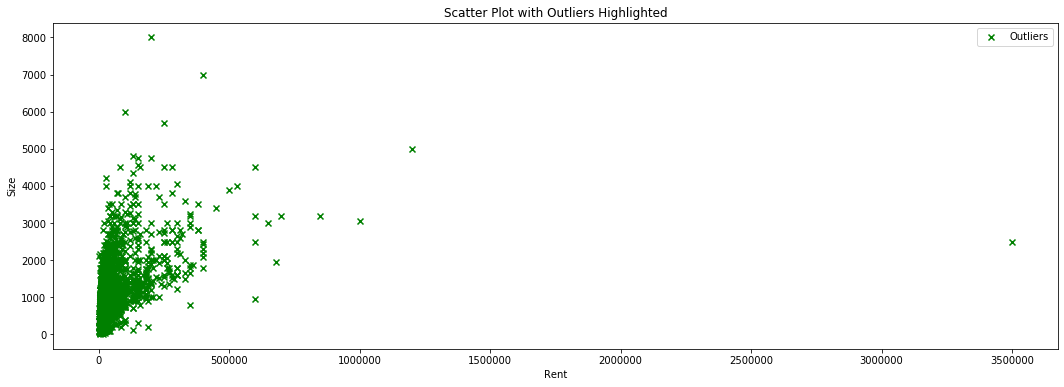

In [14]:

plt.figure(figsize=(18, 6))
plt.scatter(rentdata['Rent'], rentdata['Size'], c='green', marker='x', label='Outliers')
plt.title("Scatter Plot with Outliers Highlighted")
plt.xlabel("Rent")
plt.ylabel("Size")
plt.legend()
plt.show()

# Exploratory Data Analysis

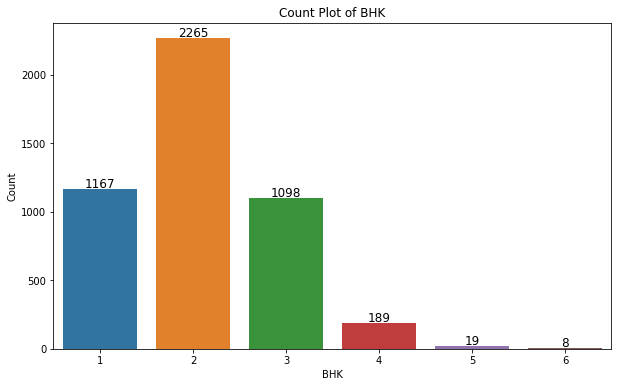

In [15]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="BHK", data=rentdata)
plt.title("Count Plot of BHK")
plt.xlabel("BHK")
plt.ylabel("Count")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()






In [16]:
rentdata.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [17]:
rentdata["Area Locality"].value_counts()

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

In [18]:

import pandas as pd
import numpy as np
rentdata.describe().T


,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


In [19]:

rentdata.corr()

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


In [20]:
rentdata["Area Type"].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

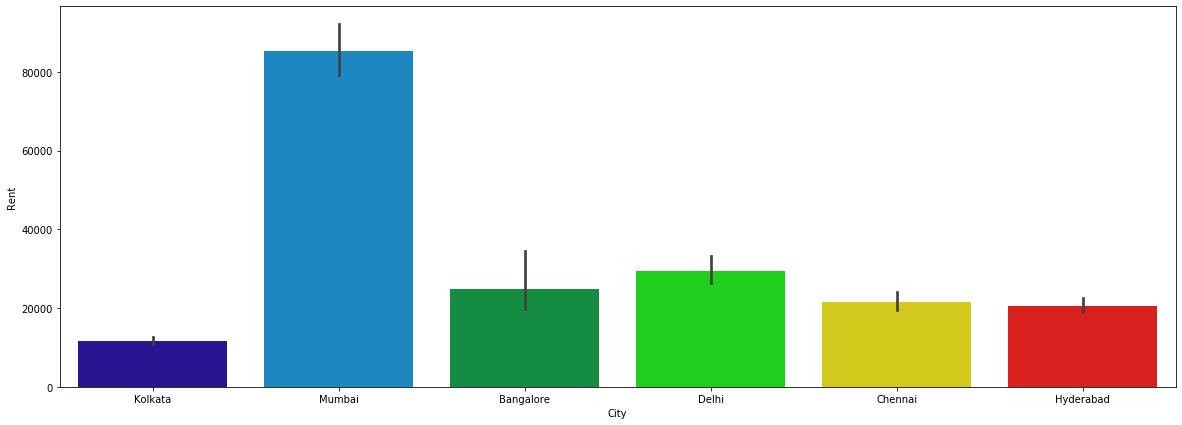

In [21]:
plt.figure(figsize = (20, 7))
sns.barplot(x = rentdata["City"], y = rentdata["Rent"], palette = "nipy_spectral")

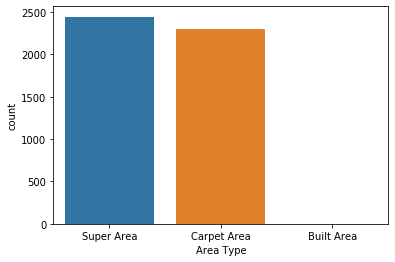

In [22]:

sns.countplot("Area Type",data=rentdata)

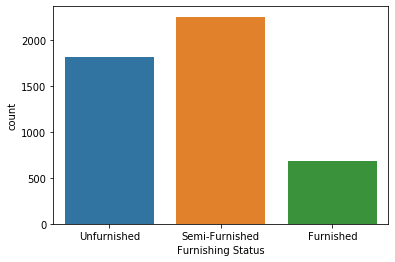

In [23]:

sns.countplot("Furnishing Status",data=rentdata)

Visulaizing numerical variables

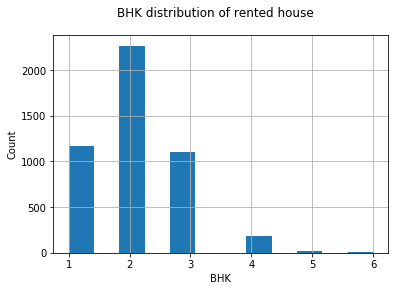

In [24]:

rentdata['BHK'].hist(bins=12)
plt.suptitle('BHK distribution of rented house')
plt.xlabel('BHK')
plt.ylabel('Count')
plt.show()

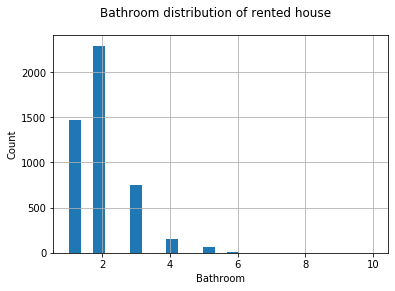

In [25]:

rentdata['Bathroom'].hist(bins=25)
plt.suptitle('Bathroom distribution of rented house')
plt.xlabel('Bathroom')
plt.ylabel('Count')
plt.show()

encoding

In [26]:

rentdata2 = rentdata.join(pd.get_dummies(rentdata[['Area Type','City','Furnishing Status','Tenant Preferred','Point of Contact']], drop_first=True))
rentdata2.drop(columns = ['Area Type','City','Furnishing Status','Tenant Preferred','Point of Contact'], inplace = True)
rentdata.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


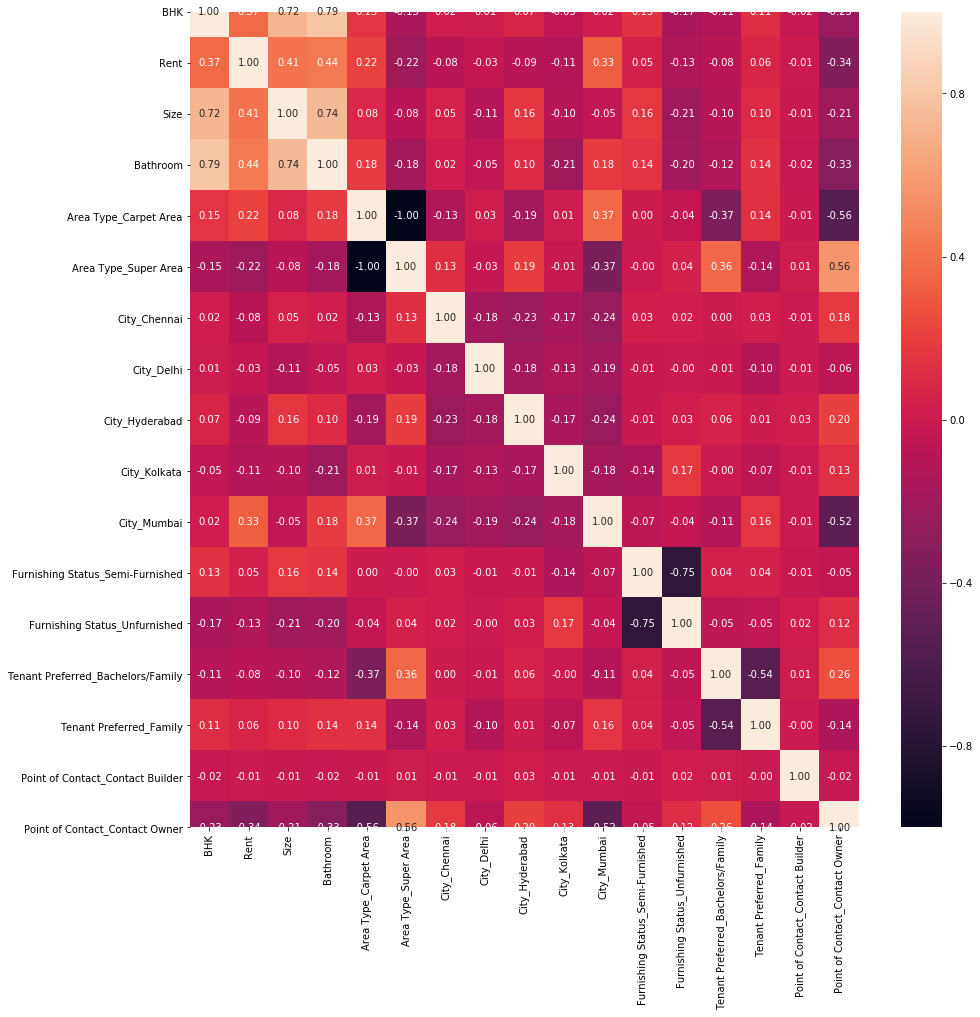

In [27]:
plt.figure(figsize=(15,15))
sns.heatmap(rentdata2.corr(),annot=True,fmt='.2f')
plt.show()

# Model Training

In [28]:
from sklearn.preprocessing import LabelEncoder
X1 = rentdata.drop(['Rent'],axis=1)
y = rentdata['Rent']

In [29]:
X2 = X1.select_dtypes('O')

for col in X2.columns:
    lb = LabelEncoder()
    X1[col] = lb.fit_transform(X2[col].values)
X1

,Posted On,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,26,2,1100,455,2,221,4,2,1,2,2
1,21,2,800,14,2,1527,4,1,1,1,2
2,24,2,1000,14,2,1760,4,1,1,1,2
3,73,2,800,10,2,526,4,2,1,1,2
4,17,2,850,10,1,1890,4,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4741,26,2,1000,271,1,219,3,1,1,2,2
4742,23,3,2000,16,2,1214,3,1,1,3,2
4743,79,3,1750,271,1,724,3,1,1,3,0
4744,75,3,1500,226,1,590,3,1,2,2,0


Data Splitting

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X1, y)

In [31]:

random_forest_model=RandomForestRegressor()
random_forest_model.fit(X_train,y_train)
print("Random Forest Training Accuracy:", random_forest_model.score(X_train,y_train))
print("Random Forest Testing Accuracy:", random_forest_model.score(X_test,y_test))


Random Forest Training Accuracy: 0.8415891615232961
Random Forest Testing Accuracy: 0.15077698328345623


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself

In [32]:

gb_model=GradientBoostingRegressor()
gb_model.fit(X_train,y_train)
print("Gradient Boost Training Accuracy:", gb_model.score(X_train,y_train))
print("Gradient Boost Testing Accuracy:", gb_model.score(X_test,y_test))

Gradient Boost Training Accuracy: 0.8358440076341549
Gradient Boost Testing Accuracy: 0.211957963054892


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1348: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.object)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1570: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sample_mask = np.ones((n_samples, ), dtype=np.bool)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1

In [33]:
from sklearn.linear_model import Lasso, LassoCV
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lasso_cv.fit(X_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [34]:
alpha = lasso_cv.alpha_
alpha
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=12.028061778034036, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
print("Lasso Regresion Training Accuracy:", lasso.score(X_train, y_train))
print("Lasso REgression Testing Accuracy:", lasso.score(X_test,y_test))

Lasso Regresion Training Accuracy: 0.24234832328825007
Lasso REgression Testing Accuracy: 0.4238398011781944


Model Evalutaion

In [36]:
def evaluate(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    print('MAE:', mean_absolute_error(y_test, pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
    print('R2 Score:', r2_score(y_test, pred))

In [37]:
evaluate(RandomForestRegressor())

MAE: 14031.261611906768
RMSE: 44902.871724052646
R2 Score: 0.5594149887217457


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [38]:
evaluate(GradientBoostingRegressor())

MAE: 14940.34333648036
RMSE: 59934.332145881715
R2 Score: 0.2150665710473485


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1348: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.object)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1570: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sample_mask = np.ones((n_samples, ), dtype=np.bool)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1

In [39]:
lasso.score(X_test, y_test)

0.4238398011781944

In [40]:
def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

In [41]:
print(adj_r2(X_train, y_train, lasso))

0.23999868459531826


In [42]:
print(adj_r2(X_test, y_test, lasso))

0.41844596101901155


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

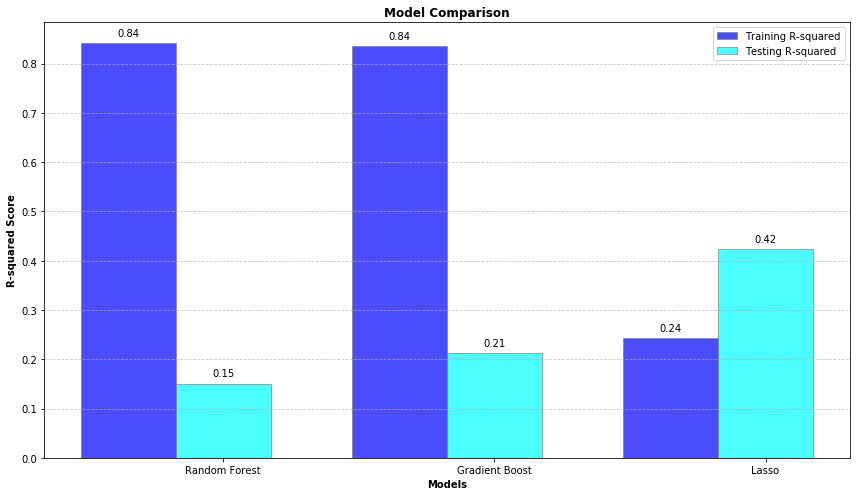

In [43]:
import matplotlib.pyplot as plt

models = [random_forest_model, gb_model, lasso]
model_names = ['Random Forest', 'Gradient Boost', 'Lasso']

train_scores = []
test_scores = []

for model in models:
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.figure(figsize=(12, 7))

barWidth = 0.35
r1 = range(len(train_scores))
r2 = [x + barWidth for x in r1]

bars1 = plt.bar(r1, train_scores, width=barWidth, color='blue', edgecolor='grey', label='Training R-squared', alpha=0.7)
bars2 = plt.bar(r2, test_scores, width=barWidth, color='cyan', edgecolor='grey', label='Testing R-squared', alpha=0.7)

plt.xlabel('Models', fontweight='bold')
plt.ylabel('R-squared Score', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(train_scores))], model_names)
plt.title('Model Comparison', fontweight='bold')

def label_bars(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

label_bars(bars1)
label_bars(bars2)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()



C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1348: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning,

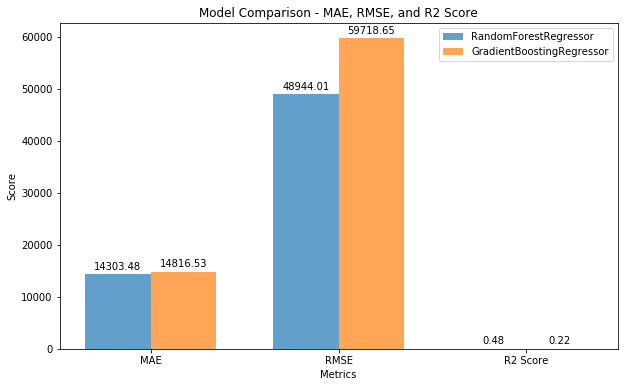

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_and_plot(model, model_name):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    
    return mae, rmse, r2

rf_mae, rf_rmse, rf_r2 = evaluate_and_plot(RandomForestRegressor(), 'RandomForestRegressor')

gb_mae, gb_rmse, gb_r2 = evaluate_and_plot(GradientBoostingRegressor(), 'GradientBoostingRegressor')

metrics = ['MAE', 'RMSE', 'R2 Score']
rf_scores = [rf_mae, rf_rmse, rf_r2]
gb_scores = [gb_mae, gb_rmse, gb_r2]

bar_width = 0.35
index = np.arange(len(metrics))

plt.figure(figsize=(10, 6))
bar1 = plt.bar(index - bar_width/2, rf_scores, bar_width, label='RandomForestRegressor', alpha=0.7)
bar2 = plt.bar(index + bar_width/2, gb_scores, bar_width, label='GradientBoostingRegressor', alpha=0.7)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Comparison - MAE, RMSE, and R2 Score')
plt.xticks(index, metrics)
plt.legend()

def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

annotate_bars(bar1)
annotate_bars(bar2)

plt.show()


In [45]:
from sklearn.neural_network import MLPRegressor

nn_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)


nn_train_score = nn_model.score(X_train, y_train)
print(f"Neural Network Training Performance: {nn_train_score}")
nn_test_score = nn_model.score(X_test, y_test)
print(f"Neural Network Testing Performance: {nn_test_score}")

Neural Network Training Performance: 0.26681297419271355
Neural Network Testing Performance: 0.4741982696731645


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [46]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

svr_model = SVR()
svr_model.fit(X_train, y_train)

svr_train_score = svr_model.score(X_train, y_train)
print(f"SVR Training Performance: {svr_train_score}")

svr_predictions = svr_model.predict(X_test)

svr_test_score = r2_score(y_test, svr_predictions)
print(f"SVR Testing Performance: {svr_test_score}")




C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR Training Performance: -0.053145618848915666
SVR Testing Performance: -0.08529138358509303


In [47]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5) 

knn.fit(X_train, y_train)

print("KNN Training Accuracy:", knn.score(X_train, y_train))
print("KNN Testing Accuracy:", knn.score(X_test, y_test))

KNN Training Accuracy: 0.36789513533452856
KNN Testing Accuracy: 0.13347901392264716


In [48]:


from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()


gnb.fit(X_train, y_train)


print("Gaussian Naive Bayes Training Accuracy:", gnb.score(X_train, y_train))
print("Gaussian Naive Bayes Testing Accuracy:", gnb.score(X_test, y_test))


Gaussian Naive Bayes Training Accuracy: 0.06996347288564203
Gaussian Naive Bayes Testing Accuracy: 0.02780117944397641


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

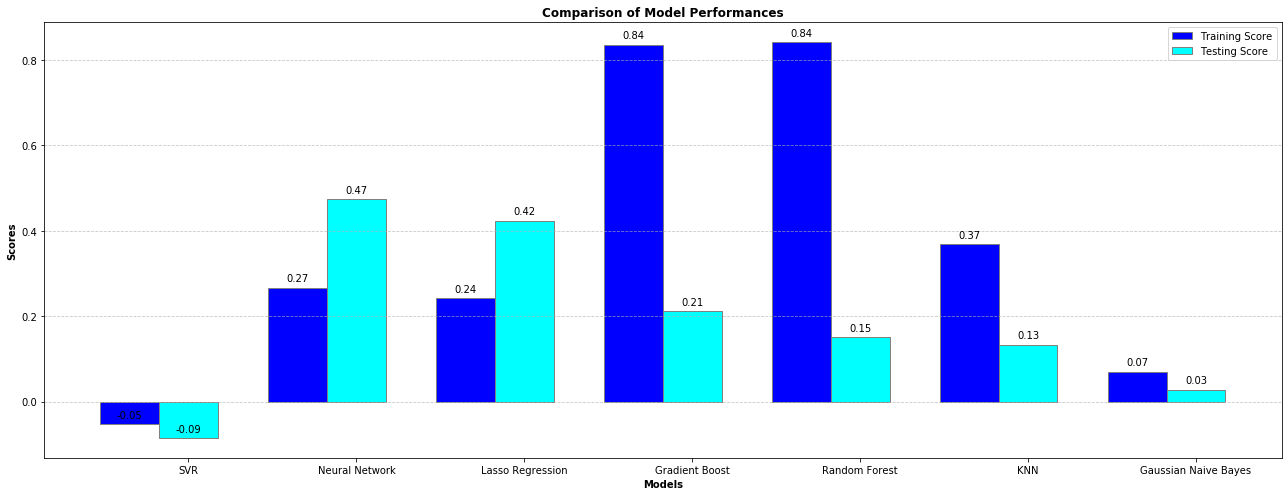

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns


models = ['SVR', 'Neural Network', 'Lasso Regression', 'Gradient Boost', 'Random Forest']
training_scores = [svr_train_score, nn_train_score, lasso.score(X_train, y_train), 
                   gb_model.score(X_train, y_train), random_forest_model.score(X_train, y_train)]

testing_scores = [svr_test_score, nn_test_score, lasso.score(X_test, y_test), 
                  gb_model.score(X_test, y_test), random_forest_model.score(X_test, y_test)]

from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor(n_neighbors=5) 


knn.fit(X_train, y_train)


models.append('KNN')
training_scores.append(knn.score(X_train, y_train))
testing_scores.append(knn.score(X_test, y_test))

from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()


gnb.fit(X_train, y_train)


models.append('Gaussian Naive Bayes')
training_scores.append(gnb.score(X_train, y_train))
testing_scores.append(gnb.score(X_test, y_test))


plt.figure(figsize=(18, 7))
barWidth = 0.35
r1 = range(len(training_scores))
r2 = [x + barWidth for x in r1]

bars1 = plt.bar(r1, training_scores, width=barWidth, color='blue', edgecolor='grey', label='Training Score')
bars2 = plt.bar(r2, testing_scores, width=barWidth, color='cyan', edgecolor='grey', label='Testing Score')


def label_bars(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')


label_bars(bars1)
label_bars(bars2)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.title('Comparison of Model Performances', fontweight='bold')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(training_scores))], models)

plt.legend()
plt.tight_layout()
plt.show()




In [50]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor  

def evaluate(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    print(model.__class__.__name__)
    print('MAE:', mean_absolute_error(y_test, pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
    print('-------------------------')


svr_model = SVR()
nn_model = MLPRegressor()  
rf_model = RandomForestRegressor()
lasso_model = Lasso()
gb_model = GradientBoostingRegressor()
knn_model = KNeighborsRegressor()
gnb_model = GaussianNB()


models = [svr_model, nn_model, rf_model, lasso_model, gb_model, knn_model, gnb_model]

for model in models:
    evaluate(model)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR
MAE: 25405.538117641085
RMSE: 70474.57007426712
-------------------------


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/d

MLPRegressor
MAE: 28871.573544634924
RMSE: 57513.62486289907
-------------------------
RandomForestRegressor
MAE: 14116.771197229244
RMSE: 55687.02091890582
-------------------------
Lasso
MAE: 25175.905893546853
RMSE: 51348.660040229646
-------------------------


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Dell\

GradientBoostingRegressor
MAE: 15000.180830227582
RMSE: 60144.8400258212
-------------------------
KNeighborsRegressor
MAE: 26355.997978096042
RMSE: 62972.19045476774
-------------------------
GaussianNB
MAE: 28540.66554338669
RMSE: 11041.881837297746
-------------------------


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not 

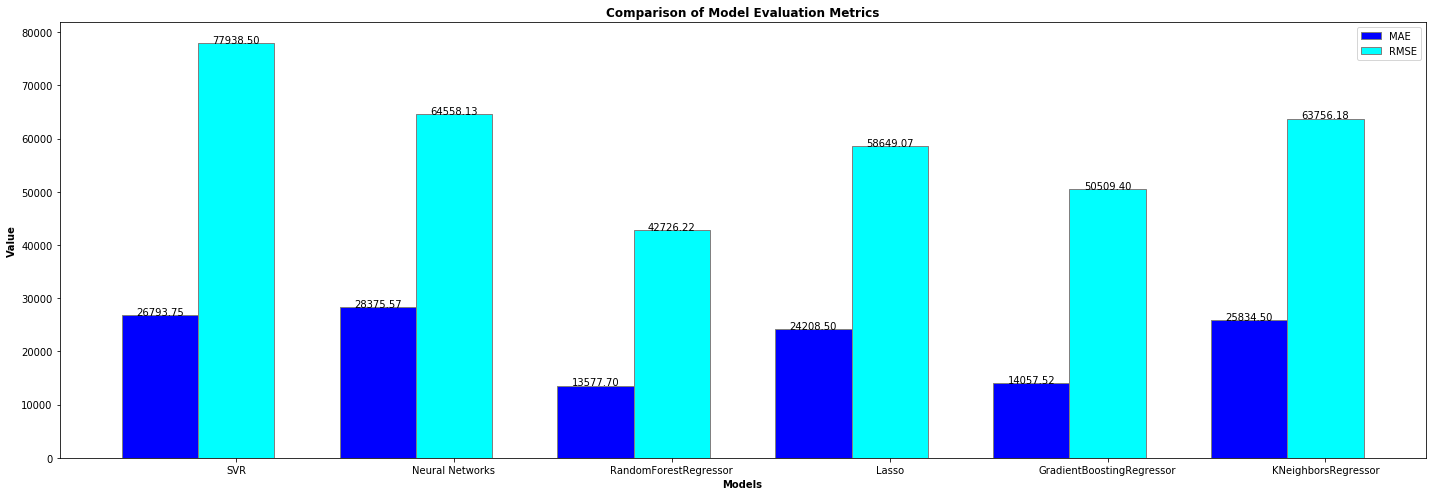

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB

def evaluate(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    
    return mae, rmse

svr_model = SVR()
nn_model = MLPRegressor()
rf_model = RandomForestRegressor()
lasso_model = Lasso()
gb_model = GradientBoostingRegressor()
knn_model = KNeighborsRegressor()

models = [svr_model, nn_model, rf_model, lasso_model, gb_model, knn_model]

model_names = [model.__class__.__name__ if model.__class__.__name__ != 'MLPRegressor' else 'Neural Networks' for model in models]

maes = []
rmses = []

for model in models:
    if model.__class__.__name__ == 'GaussianNB':
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, pred)
        rmse = np.sqrt(mean_squared_error(y_test, pred))
    else:
        mae, rmse = evaluate(model)
    maes.append(mae)
    rmses.append(rmse)


barWidth = 0.35
r1 = range(len(maes))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(20, 7))

plt.bar(r1, maes, width=barWidth, color='blue', edgecolor='grey', label='MAE')
plt.bar(r2, rmses, width=barWidth, color='cyan', edgecolor='grey', label='RMSE')

plt.title('Comparison of Model Evaluation Metrics', fontweight='bold')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(maes))], model_names)


for i in range(len(r1)):
    plt.text(r1[i], maes[i] + 0.01, f"{maes[i]:.2f}", ha='center')
    plt.text(r2[i], rmses[i] + 0.01, f"{rmses[i]:.2f}", ha='center')

plt.legend()
plt.tight_layout()
plt.show()


In [51]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display


file_path = "House_Rent_Dataset.csv"
df = pd.read_csv(file_path)


city_dropdown = widgets.Dropdown(
    options=df['City'].unique(),
    description="Select City:",
    disabled=False
)


output = widgets.Output()


def calculate_average_rent(change):
    selected_city = city_dropdown.value
    average_rent = df[df['City'] == selected_city]['Rent'].mean()
    
    with output:
        output.clear_output()
        print(f"Predicted Average Rent for {selected_city}: {average_rent:.2f}")

city_dropdown.observe(calculate_average_rent, names='value')

display(city_dropdown, output)



Dropdown(description='Select City:', options=('Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad…

Output()

In [24]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display


file_path = "House_Rent_Dataset.csv"
df = pd.read_csv(file_path)


city_dropdown = widgets.Dropdown(
    options=df['City'].unique(),
    description="Select City:",
    disabled=False
)

bhk_dropdown = widgets.Dropdown(
    options=df['BHK'].unique(),
    description="Select BHK:",
    disabled=False
)

bathroom_dropdown = widgets.Dropdown(
    options=df['Bathroom'].unique(),
    description="Select Bathroom:",
    disabled=False
)


output = widgets.Output()


def calculate_average_rent(change):
    selected_city = city_dropdown.value
    selected_bhk = bhk_dropdown.value
    selected_bathroom = bathroom_dropdown.value
    
    filtered_df = df[
        (df['City'] == selected_city) &
        (df['BHK'] == selected_bhk) &
        (df['Bathroom'] == selected_bathroom)
    ]
    
    if len(filtered_df) == 0:
        with output:
            output.clear_output()
            print("No matching data found.")
        return
    
    average_rent = filtered_df['Rent'].mean()
    
    with output:
        output.clear_output()
        print(f"Predicted Average Rent for {selected_city}, {selected_bhk} BHK, {selected_bathroom} Bathroom: {average_rent:.2f}")

city_dropdown.observe(calculate_average_rent, names='value')
bhk_dropdown.observe(calculate_average_rent, names='value')
bathroom_dropdown.observe(calculate_average_rent, names='value')

display(city_dropdown, bhk_dropdown, bathroom_dropdown, output)


Dropdown(description='Select City:', options=('Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad…

Dropdown(description='Select BHK:', options=(2, 1, 3, 6, 4, 5), value=2)

Dropdown(description='Select Bathroom:', options=(2, 1, 3, 5, 4, 6, 7, 10), value=2)

Output()

In [25]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

file_path = "House_Rent_Dataset.csv"
df = pd.read_csv(file_path)

city_dropdown = widgets.Dropdown(
    options=['', *df['City'].unique()],
    value='',
    description="Select City:",
    disabled=False
)

bhk_dropdown = widgets.Dropdown(
    options=['', *df['BHK'].unique()],
    value='',
    description="Select BHK:",
    disabled=False
)

bathroom_dropdown = widgets.Dropdown(
    options=['', *df['Bathroom'].unique()],
    value='',
    description="Select Bathroom:",
    disabled=False
)

output = widgets.Output()

def calculate_average_rent(change):
    selected_city = city_dropdown.value
    selected_bhk = bhk_dropdown.value
    selected_bathroom = bathroom_dropdown.value
    
    filtered_df = df[
        (df['City'] == selected_city if selected_city else True) &
        (df['BHK'] == selected_bhk if selected_bhk else True) &
        (df['Bathroom'] == selected_bathroom if selected_bathroom else True)
    ]
    
    if len(filtered_df) == 0:
        with output:
            output.clear_output()
            print("No matching data found.")
        return
    
    average_rent = filtered_df['Rent'].mean()
    
    with output:
        output.clear_output()
        if selected_city or selected_bhk or selected_bathroom:
            print(f"Predicted Average Rent for {selected_city}, {selected_bhk} BHK, {selected_bathroom} Bathroom: {average_rent:.2f}")

city_dropdown.observe(calculate_average_rent, names='value')
bhk_dropdown.observe(calculate_average_rent, names='value')
bathroom_dropdown.observe(calculate_average_rent, names='value')

display(city_dropdown, bhk_dropdown, bathroom_dropdown, output)


Dropdown(description='Select City:', options=('', 'Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyder…

Dropdown(description='Select BHK:', options=('', 2, 1, 3, 6, 4, 5), value='')

Dropdown(description='Select Bathroom:', options=('', 2, 1, 3, 5, 4, 6, 7, 10), value='')

Output()

# GUI

In [52]:
import pandas as pd
import webbrowser
import os

df = pd.read_csv("House_Rent_Dataset.csv")
data_json = df.to_json(orient='records')

html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Rent Prediction Tool</title>
</head>
<body>
    <div>
        <h2>Rent Prediction Tool</h2>
        <label for="city">Select City:</label>
        <select id="city" onchange="updateRent()">
            <option value="">Select City</option>
            <!-- Options will be filled by JavaScript -->
        </select>

        <label for="bhk">Select BHK:</label>
        <select id="bhk" onchange="updateRent()">
            <option value="">Select BHK</option>
            <!-- Options will be filled by JavaScript -->
        </select>

        <label for="bathroom">Select Bathroom:</label>
        <select id="bathroom" onchange="updateRent()">
            <option value="">Select Bathroom</option>
            <!-- Options will be filled by JavaScript -->
        </select>

        <p id="result">Predicted Average Rent: </p>
    </div>

    <script type="text/javascript">
        var data = {data_json};

        function fillDropdowns() {{
            var cities = new Set(data.map(item => item.City));
            var bhks = new Set(data.map(item => item.BHK));
            var bathrooms = new Set(data.map(item => item.Bathroom));

            cities.forEach(city => {{
                document.getElementById('city').innerHTML += '<option value="' + city + '">' + city + '</option>';
            }});

            bhks.forEach(bhk => {{
                document.getElementById('bhk').innerHTML += '<option value="' + bhk + '">' + bhk + '</option>';
            }});

            bathrooms.forEach(bathroom => {{
                document.getElementById('bathroom').innerHTML += '<option value="' + bathroom + '">' + bathroom + '</option>';
            }});
        }}

        function updateRent() {{
            var selectedCity = document.getElementById('city').value;
            var selectedBHK = document.getElementById('bhk').value;
            var selectedBathroom = document.getElementById('bathroom').value;

            var filteredData = data.filter(function(item) {{
                return (item.City == selectedCity || selectedCity === '') &&
                       (item.BHK == selectedBHK || selectedBHK === '') &&
                       (item.Bathroom == selectedBathroom || selectedBathroom === '');
            }});

            var averageRent = filteredData.reduce((acc, curr) => acc + curr.Rent, 0) / filteredData.length;
            document.getElementById('result').innerText = 'Predicted Average Rent: ' + (isNaN(averageRent) ? 'N/A' : averageRent.toFixed(2));
        }}

        fillDropdowns();
    </script>
</body>
</html>
"""

# Write the HTML content to a file
file_name = 'rent_prediction_tool.html'
with open(file_name, 'w') as file:
    file.write(html_content)

# Open the HTML file in the default web browser
webbrowser.open('file://' + os.path.realpath(file_name))


True

# Model testing on other Dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

df = pd.read_excel('New dataset.xlsx')

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('price')
categorical_cols = df.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
])

models = {
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    print(model.__class__.__name__)
    print('Training Metrics:')
    print(' - MAE:', mean_absolute_error(y_train, pred_train))
    print(' - RMSE:', np.sqrt(mean_squared_error(y_train, pred_train)))
    print(' - R2 Score:', r2_score(y_train, pred_train))
    print('Testing Metrics:')
    print(' - MAE:', mean_absolute_error(y_test, pred_test))
    print(' - RMSE:', np.sqrt(mean_squared_error(y_test, pred_test)))
    print(' - R2 Score:', r2_score(y_test, pred_test))
    print()

for name, model in models.items():
    print(name)
    evaluate_model(model, X_train_transformed, y_train, X_test_transformed, y_test)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

Lasso Regression
Lasso
Training Metrics:
 - MAE: 109.91902959322589
 - RMSE: 158.13765604279794
 - R2 Score: 0.4977239824775703
Testing Metrics:
 - MAE: 111.55423257986753
 - RMSE: 157.7963332176158
 - R2 Score: 0.5078029598318978

Random Forest
RandomForestRegressor
Training Metrics:
 - MAE: 26.931038798498125
 - RMSE: 51.21605014290247
 - R2 Score: 0.9473153606381876
Testing Metrics:
 - MAE: 92.52
 - RMSE: 188.6471081145958
 - R2 Score: 0.2965301518776733

Gradient Boosting


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself

GradientBoostingRegressor
Training Metrics:
 - MAE: 63.56127822533292
 - RMSE: 90.81538753807067
 - R2 Score: 0.834350271398963
Testing Metrics:
 - MAE: 93.30792632709927
 - RMSE: 155.1365647898079
 - R2 Score: 0.5242557755026331



C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Dell\

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_int = np.zeros((n_samples, n_features), dtype=np.int)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:111: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more deta

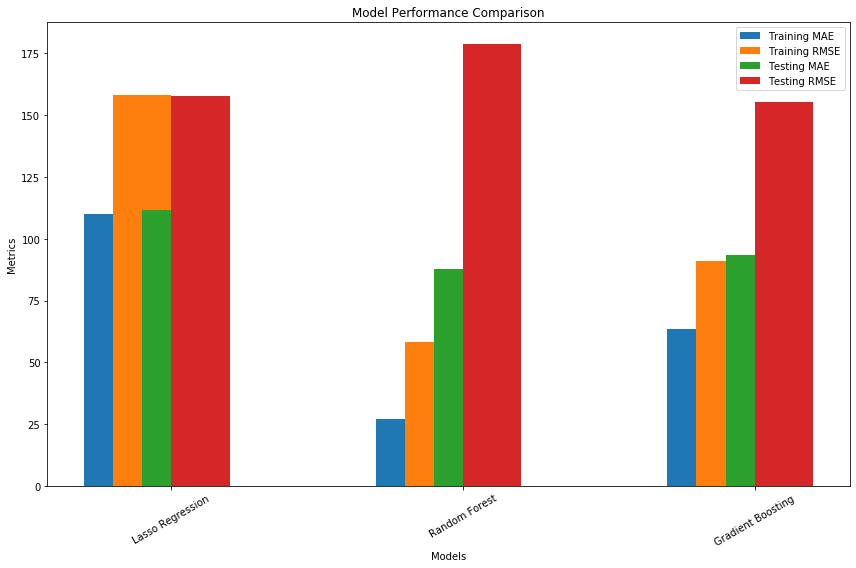

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel('New dataset.xlsx')


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('price')
categorical_cols = df.select_dtypes(include=['object']).columns


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
])


models = {
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}


X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_mae = mean_absolute_error(y_train, pred_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, pred_train))
    train_r2 = r2_score(y_train, pred_train)
    
    test_mae = mean_absolute_error(y_test, pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, pred_test))
    test_r2 = r2_score(y_test, pred_test)
    
    return train_mae, train_rmse, train_r2, test_mae, test_rmse, test_r2


model_names = []
train_maes = []
train_rmses = []
train_r2s = []
test_maes = []
test_rmses = []
test_r2s = []

for name, model in models.items():
    model_names.append(name)
    train_mae, train_rmse, train_r2, test_mae, test_rmse, test_r2 = evaluate_model(model, X_train_transformed, y_train, X_test_transformed, y_test)
    train_maes.append(train_mae)
    train_rmses.append(train_rmse)
    train_r2s.append(train_r2)
    test_maes.append(test_mae)
    test_rmses.append(test_rmse)
    test_r2s.append(test_r2)


bar_width = 0.2
index = np.arange(len(model_names))

plt.figure(figsize=(12, 8))

plt.bar(index - bar_width, train_maes, bar_width, label='Training MAE', align='center')
plt.bar(index - bar_width, train_rmses, bar_width, label='Training RMSE', align='edge')
plt.bar(index, test_maes, bar_width, label='Testing MAE', align='center')
plt.bar(index, test_rmses, bar_width, label='Testing RMSE', align='edge')

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Model Performance Comparison')
plt.xticks(index, model_names, rotation=30)
plt.legend(loc='best')
plt.tight_layout()

plt.show()
